In [4]:
# Load and clean discharge dataset

import pandas as pd
import matplotlib.pyplot as plt

discharge_df = pd.read_csv('../data/discharge_df.csv')
discharge_df['start_datetime'] = pd.to_datetime(discharge_df['start_datetime'])
discharge_df.drop(columns=['start_time'], inplace=True)


In [6]:
# Inspect columns and datatypes

discharge_df.info()
discharge_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2794 entries, 0 to 2793
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   type                 2794 non-null   object        
 1   ambient_temperature  2794 non-null   int64         
 2   battery_id           2794 non-null   object        
 3   test_id              2794 non-null   int64         
 4   uid                  2794 non-null   int64         
 5   filename             2794 non-null   object        
 6   Capacity             2794 non-null   object        
 7   Re                   0 non-null      float64       
 8   Rct                  0 non-null      float64       
 9   start_datetime       2794 non-null   datetime64[ns]
 10  cycle_number         2794 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 240.2+ KB


,type,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct,start_datetime,cycle_number
0,discharge,24,B0005,1,5122,05122.csv,1.8564874208181574,NaN,NaN,2008-04-02 15:25:00,0
1,discharge,24,B0005,3,5124,05124.csv,1.846327249719927,NaN,NaN,2008-04-02 19:43:00,1
2,discharge,24,B0005,5,5126,05126.csv,1.8353491942234077,NaN,NaN,2008-04-03 00:01:00,2
3,discharge,24,B0005,7,5128,05128.csv,1.8352625275821128,NaN,NaN,2008-04-03 04:16:00,3
4,discharge,24,B0005,9,5130,05130.csv,1.8346455082120419,NaN,NaN,2008-04-03 08:33:00,4
...,...,...,...,...,...,...,...,...,...,...,...
2789,discharge,4,B0056,240,7302,07302.csv,1.1302191455340138,NaN,NaN,2010-09-29 19:50:00,97
2790,discharge,4,B0056,242,7304,07304.csv,1.1258719408034097,NaN,NaN,2010-09-29 23:33:00,98
2791,discharge,4,B0056,244,7306,07306.csv,1.1430108283920968,NaN,NaN,2010-09-30 03:15:00,99
2792,discharge,4,B0056,248,7310,07310.csv,1.1372731775310292,NaN,NaN,2010-09-30 08:08:00,100


In [7]:
# Basic stats: number of batteries and total discharge cycles

num_batteries = discharge_df['battery_id'].nunique()
num_cycles = len(discharge_df)

print(f'Unique Batteries: {num_batteries}')
print(f'Total Discharge Cycles: {num_cycles}')


Unique Batteries: 34
Total Discharge Cycles: 2794


In [8]:
# Missing value check

discharge_df.isna().sum()


type                      0
ambient_temperature       0
battery_id                0
test_id                   0
uid                       0
filename                  0
Capacity                  0
Re                     2794
Rct                    2794
start_datetime            0
cycle_number              0
dtype: int64

In [10]:
# Summary statistics of Capacity

discharge_df['Capacity'] = pd.to_numeric(discharge_df['Capacity'], errors='coerce')
discharge_df['Capacity'] = discharge_df['Capacity'].astype(float)
discharge_df['Capacity'].describe()


count    2769.000000
mean        1.326543
std         0.472517
min         0.000000
25%         1.150286
50%         1.428065
75%         1.673645
max         2.640149
Name: Capacity, dtype: float64

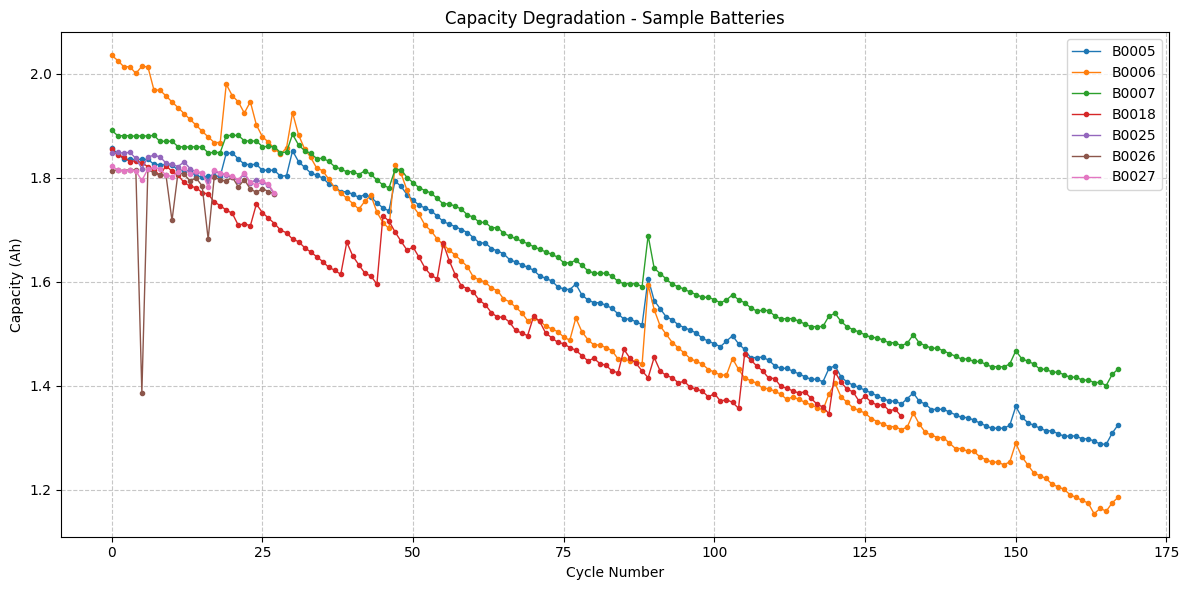

In [12]:
# Plot Capacity vs Cycle Number for a sample of batteries

sample_batteries = discharge_df['battery_id'].unique()[:7]

plt.figure(figsize=(12,6))

for b in sample_batteries:
    temp = discharge_df[discharge_df['battery_id'] == b]
    plt.plot(temp['cycle_number'], temp['Capacity'], marker='o', linestyle='-', markersize=3, linewidth=1, label=b)

plt.xlabel('Cycle Number')
plt.ylabel('Capacity (Ah)')
plt.title('Capacity Degradation - Sample Batteries')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


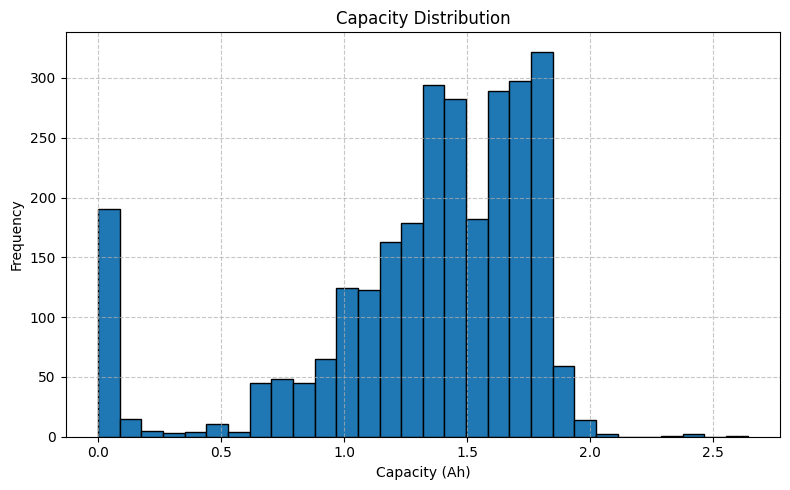

In [13]:
# Plot Capacity distribution (histogram)

plt.figure(figsize=(8,5))
plt.hist(discharge_df['Capacity'], bins=30, edgecolor='black')
plt.xlabel('Capacity (Ah)')
plt.ylabel('Frequency')
plt.title('Capacity Distribution')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [14]:
# Batteries with max and min number of cycles

battery_cycle_counts = discharge_df.groupby('battery_id')['cycle_number'].max().sort_values(ascending=False)

print("Top 5 batteries by cycle count:")
print(battery_cycle_counts.head())

print("\nBottom 5 batteries by cycle count:")
print(battery_cycle_counts.tail())


Top 5 batteries by cycle count:
battery_id
B0033    196
B0036    196
B0034    196
B0005    167
B0007    167
Name: cycle_number, dtype: int64

Bottom 5 batteries by cycle count:
battery_id
B0025    27
B0049    24
B0050    24
B0051    24
B0052    24
Name: cycle_number, dtype: int64


In [16]:
# Create Battery-Wise Summary Table

battery_summary = discharge_df.groupby('battery_id').agg(
    total_cycles = ('cycle_number', 'max'),
    initial_capacity = ('Capacity', 'first'),
    final_capacity = ('Capacity', 'last')
)

battery_summary['capacity_loss_percent'] = ((battery_summary['initial_capacity'] - battery_summary['final_capacity']) / battery_summary['initial_capacity']) * 100
battery_summary = battery_summary.reset_index()

battery_summary


,battery_id,total_cycles,initial_capacity,final_capacity,capacity_loss_percent
0,B0005,167,1.856487,1.325079,28.624384
1,B0006,167,2.035338,1.185675,41.745525
2,B0007,167,1.891052,1.432455,24.250891
3,B0018,131,1.855005,1.341051,27.706298
4,B0025,27,1.847011,1.767789,4.289204
5,B0026,27,1.813250,1.768754,2.453953
6,B0027,27,1.823308,1.770093,2.918605
7,B0028,27,1.804685,1.717234,4.845788
8,B0029,39,1.697507,1.612080,5.032527
9,B0030,39,1.656071,1.562780,5.633226


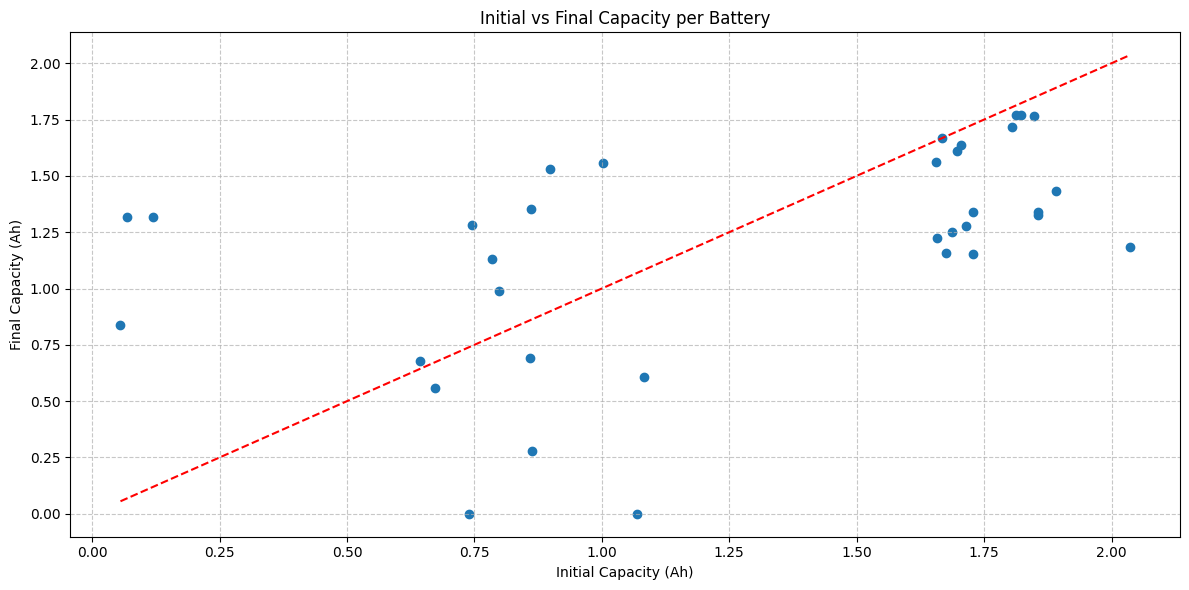

In [17]:
# Plot Initial vs Final Capacity per Battery

plt.figure(figsize=(12,6))
plt.scatter(battery_summary['initial_capacity'], battery_summary['final_capacity'], marker='o')
plt.plot([battery_summary['initial_capacity'].min(), battery_summary['initial_capacity'].max()],
         [battery_summary['initial_capacity'].min(), battery_summary['initial_capacity'].max()],
         color='red', linestyle='--')
plt.xlabel('Initial Capacity (Ah)')
plt.ylabel('Final Capacity (Ah)')
plt.title('Initial vs Final Capacity per Battery')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
